# **IMPORTING NECESSARY LIBRARY**



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from tensorflow import keras
from tensorflow.keras import layers
import ipywidgets as widgets
from IPython.display import display
from joblib import load
from tensorflow.keras.models import save_model
from joblib import dump
from tensorflow.keras.models import load_model

# **DATASET IMPORT**

In [2]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Path to the CSV file
csv_path = '/content/drive/My Drive/366 PROJECT/DATASET/houserentdhaka.csv'

# Import necessary libraries
import pandas as pd

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df)


Mounted at /content/drive


FileNotFoundError: ignored

# **PREPROCESS THE DATA AND SPLIT**

In [ ]:
# Preprocess the data
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['Area'] = df['Area'].str.replace(' sqft', '').str.replace(',', '').astype(float)

# Convert the "Price" column to numerical values
df['Price'] = df['Price'].replace({' Thousand': 'e3', ' Lakh': 'e5'}, regex=True).map(pd.eval).astype(float)

# Split the data into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Standardize numerical features
scaler = StandardScaler()
X[['Area', 'Bed', 'Bath']] = scaler.fit_transform(X[['Area', 'Bed', 'Bath']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **TRAIN NEURAL NETWORK**

In [ ]:
# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=1)


Epoch 1/100
720/720 [==============================] - 5s 3ms/step - loss: 601313536.0000
Epoch 2/100
720/720 [==============================] - 2s 3ms/step - loss: 553184384.0000
Epoch 3/100
720/720 [==============================] - 2s 2ms/step - loss: 549518720.0000
Epoch 4/100
720/720 [==============================] - 2s 2ms/step - loss: 545201792.0000
Epoch 5/100
720/720 [==============================] - 2s 2ms/step - loss: 537585536.0000
Epoch 6/100
720/720 [==============================] - 2s 2ms/step - loss: 521832416.0000
Epoch 7/100
720/720 [==============================] - 2s 2ms/step - loss: 485874208.0000
Epoch 8/100
720/720 [==============================] - 2s 2ms/step - loss: 418816352.0000
Epoch 9/100
720/720 [==============================] - 2s 3ms/step - loss: 341912896.0000
Epoch 10/100
720/720 [==============================] - 2s 3ms/step - loss: 286163712.0000
Epoch 11/100
720/720 [==============================] - 2s 2ms/step - loss: 261875216.0000
Epoch 12

# **SAVE THE MODEL**

In [ ]:
# Path to save the model
model_save_path = '/content/drive/My Drive/366 PROJECT/MODELS/keras_neural_network_model'

# Save the trained Keras Neural Network model
model.save(model_save_path)

# **TRAIN RANDOM FOREST **

In [ ]:
# Build the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# **SAVE RANDOM FREST**

In [ ]:
# Path to save the model
model_save_path = '/content/drive/My Drive/366 PROJECT/MODELS/random_forest_model.joblib'

# Save the trained Random Forest model
dump(rf_model, model_save_path)

['/content/drive/My Drive/366 PROJECT/MODELS/random_forest_model.joblib']

# **LOAD BOTH MODEL**

In [ ]:
# Path to load the Keras Neural Network model
model_load_path_keras = '/content/drive/My Drive/366 PROJECT/MODELS/keras_neural_network_model'

# Load the trained Keras Neural Network model
loaded_keras_model = load_model(model_load_path_keras)

# Path to load the Random Forest model
model_load_path_rf = '/content/drive/My Drive/366 PROJECT/MODELS/random_forest_model.joblib'

# Load the trained Random Forest model
loaded_rf_model = load(model_load_path_rf)

# **EVALUATE BOTH MODEL**

In [ ]:
# Evaluate Neural Network model
y_pred_nn = loaded_keras_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn.round(), average='weighted')

print('Metrics for Neural Network:')
print(f'Mean Squared Error: {mse_nn}')
print(f'R-squared Value: {r2_nn}')
print(f'F1 Score: {f1_nn}')

# Evaluate Random Forest model
y_pred_rf = loaded_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf.round(), average='weighted')

print('\nMetrics for Random Forest:')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared Value: {r2_rf}')
print(f'F1 Score: {f1_rf}')


180/180 [==============================] - 1s 2ms/step
Metrics for Neural Network:
Mean Squared Error: 85970744.4849648
R-squared Value: 0.7951438540456544
F1 Score: 0.0003452151573538857

Metrics for Random Forest:
Mean Squared Error: 43979480.019418925
R-squared Value: 0.8952031085478158
F1 Score: 0.04093408145885082


# **USER INPUT FOR PREDICTION**

In [ ]:
# Create dropdown for location
location_dropdown = widgets.Dropdown(
    options=le.classes_,
    value=le.classes_[0],
    description='Location:',
)

# Create text inputs for other features
area_text = widgets.Text(description='Area (sqft):', value='1000')
bed_text = widgets.Text(description='Bedrooms:', value='3')
bath_text = widgets.Text(description='Bathrooms:', value='2')

# Create buttons for predictions
predict_button_nn = widgets.Button(description='Predict Price (Neural Network)')
predict_button_rf = widgets.Button(description='Predict Price (Random Forest)')

# Function to be called when the buttons are clicked for Neural Network and Random Forest
def predict_price(button):
    user_location = location_dropdown.value
    user_area = float(area_text.value.replace(',', ''))
    user_bed = int(bed_text.value)

    # Check if 'Bathrooms' input is not empty
    user_bath_text = bath_text.value
    user_bath = int(user_bath_text) if user_bath_text else 0

    # Preprocess user input
    user_location_encoded = le.transform([user_location])[0]
    user_data = pd.DataFrame({'Unnamed: 0': [0], 'Location': [user_location_encoded], 'Area': [user_area], 'Bed': [user_bed], 'Bath': [user_bath]})
    user_data[['Area', 'Bed', 'Bath']] = scaler.transform(user_data[['Area', 'Bed', 'Bath']])

    if button.description == 'Predict Price (Neural Network)':
        # Predict the price using Neural Network
        predicted_price = loaded_keras_model.predict(user_data)
        print(f'Predicted Price (Neural Network): {predicted_price[0][0]}')
    elif button.description == 'Predict Price (Random Forest)':
        # Predict the price using Random Forest
        predicted_price = loaded_rf_model.predict(user_data)
        print(f'Predicted Price (Random Forest): {predicted_price[0]}')

# Attach the function to the button click events
predict_button_nn.on_click(predict_price)
predict_button_rf.on_click(predict_price)

# Display the widgets
display(location_dropdown, area_text, bed_text, bath_text, predict_button_nn, predict_button_rf)

Dropdown(description='Location:', options=('1st Colony, Mirpur, Dhaka', '22 Bari, West Kazipara, Mirpur, Dhaka…

Text(value='1000', description='Area (sqft):')

Text(value='3', description='Bedrooms:')

Text(value='2', description='Bathrooms:')

Button(description='Predict Price (Neural Network)', style=ButtonStyle())

Button(description='Predict Price (Random Forest)', style=ButtonStyle())

1/1 [==============================] - 0s 134ms/step
Predicted Price (Neural Network): 19236.404296875
Predicted Price (Random Forest): 18920.0
1/1 [==============================] - 0s 27ms/step
Predicted Price (Neural Network): 21731.24609375
Predicted Price (Random Forest): 28980.0


Epoch 1/100
720/720 [==============================] - 4s 3ms/step - loss: 610651136.0000
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 554289408.0000
Epoch 3/100
720/720 [==============================] - 1s 2ms/step - loss: 550896192.0000
Epoch 4/100
720/720 [==============================] - 1s 2ms/step - loss: 547612992.0000
Epoch 5/100
720/720 [==============================] - 1s 2ms/step - loss: 543416704.0000
Epoch 6/100
720/720 [==============================] - 1s 2ms/step - loss: 536130752.0000
Epoch 7/100
720/720 [==============================] - 1s 2ms/step - loss: 523826976.0000
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 497372128.0000
Epoch 9/100
720/720 [==============================] - 2s 2ms/step - loss: 445260512.0000
Epoch 10/100
720/720 [==============================] - 2s 2ms/step - loss: 381311552.0000
Epoch 11/100
720/720 [==============================] - 2s 2ms/step - loss: 324037632.0000
Epoch 12

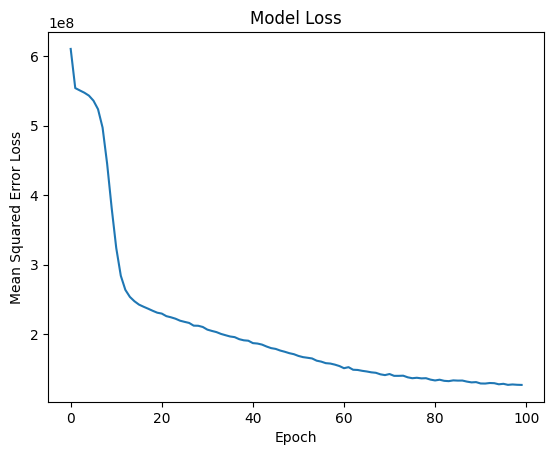

In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

# Assuming X_train and y_train are already defined

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=100, verbose=1)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.show()



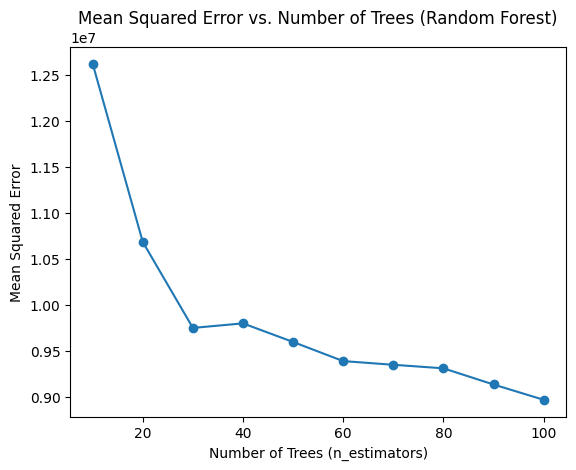

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined

# Build a range of n_estimators values
n_estimators_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Initialize an empty list to store Mean Squared Errors
mse_values = []

# Train Random Forest models with different n_estimators values
for n_estimators in n_estimators_values:
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    y_train_pred = rf_model.predict(X_train)
    mse = mean_squared_error(y_train, y_train_pred)
    mse_values.append(mse)

# Plot the Mean Squared Error as a function of n_estimators
plt.plot(n_estimators_values, mse_values, marker='o')
plt.title('Mean Squared Error vs. Number of Trees (Random Forest)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Squared Error')
plt.show()


720/720 [==============================] - 2s 2ms/step
Mean Squared Error on Training Set (Neural Network): 120661012.32597779


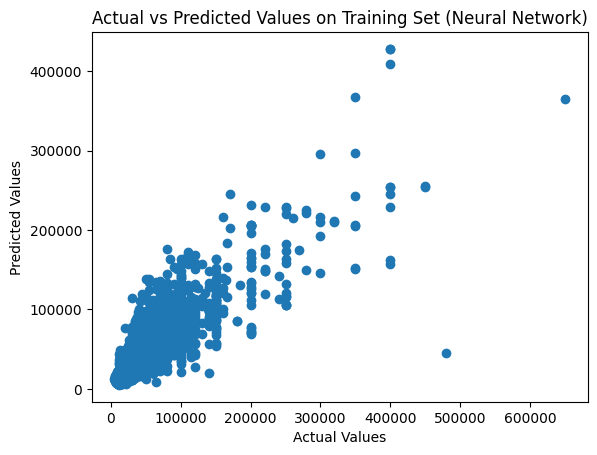

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined

# Predict on the training set using the trained neural network
y_train_pred_nn = model.predict(X_train)

# Calculate Mean Squared Error on the training set
mse_train_nn = mean_squared_error(y_train, y_train_pred_nn)
print(f"Mean Squared Error on Training Set (Neural Network): {mse_train_nn}")

# Optionally, you can plot the predicted vs actual values
plt.scatter(y_train, y_train_pred_nn)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values on Training Set (Neural Network)")
plt.show()


Mean Squared Error on Training Set: 8967167.728412034


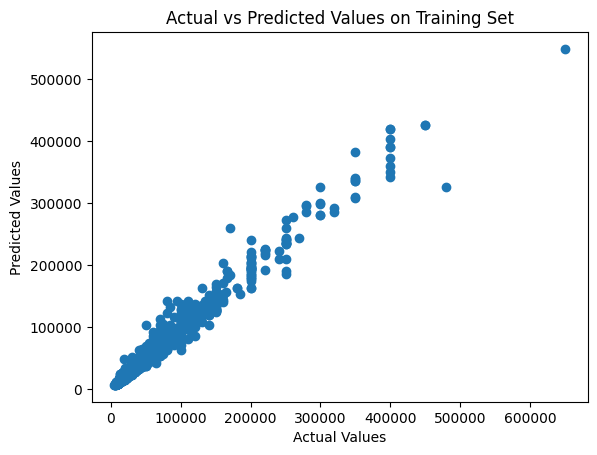

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train and y_train are already defined

# Build the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_model.predict(X_train)

# Calculate Mean Squared Error on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error on Training Set: {mse_train}")

# Optionally, you can plot the predicted vs actual values
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values on Training Set")
plt.show()
